# Recherche de racines

## Pour définir les fonctions 

Voici la fonction $f(x)=-2x^3+x^2+3x-1$, on va chercher la solution de $f(x)=0$ comprise entre 0 et 1 

In [1]:
def f(x):
    return -2*x**3 + x**2+3*x-1

# compléter avec la dérivée
def df(x):
    return -6*x**2+2*x+3

## Les algorithmes en Python

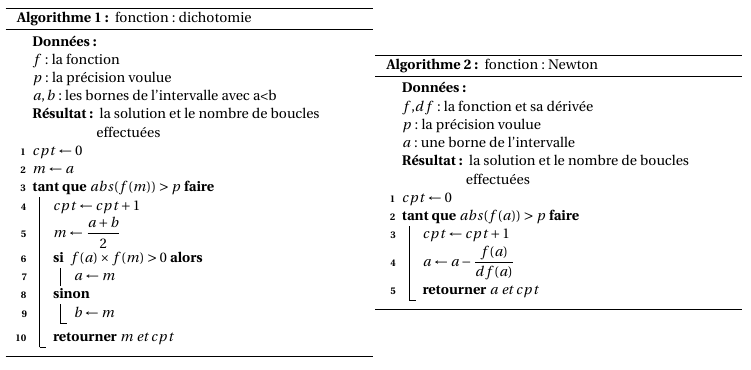

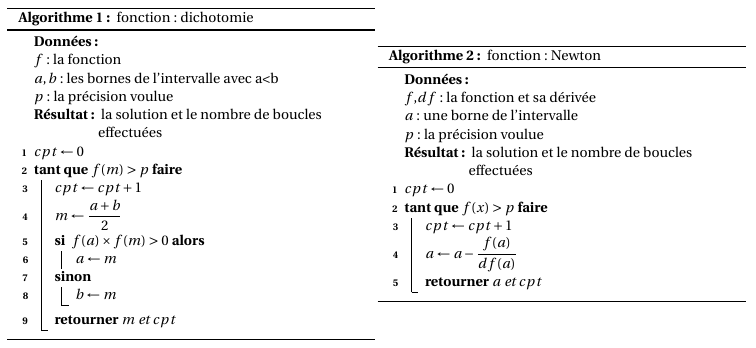

Pour voir la méthode Newton en action voici le lien [Méthode de Newton](https://www.geogebra.org/m/btWzSGbe)

<div class="alert" style="background-color: #E3EFFF;border-left:1px solid #5CA2FF  ">
    
Traduire les algorithmes en Python, les fonctions se nomment **dichotomie** et **Newton**.
</div>

Remarque: dans les deux algorithmes, la précision n'est pas celle habituellement utilisée c'est à dire sur la racine mais sur l'image. Vous verrez par la suite (post-bac) que pour un intervalle fermé $I$ et pour une fonction continue et dérivable sur $I$, le lien entre les deux précisions.

In [2]:
# Taper ici les deux algorithmes en Python 
# ordre des paramètres suivant le bloc Données

def dichotomie(f,p,a,b):
    cpt = 0
    m = a
    while abs(f(m)) > p:
        cpt = cpt+1
        m = (a+b)/2
        if f(a)*f(m) > 0:
            a = m
        else:
            b = m
    return m, cpt

def Newton(f,df,p,a):
    cpt = 0
    m = a
    while abs(f(a)) > p:
        cpt = cpt+1
        a  = a - f(a)/df(a)
    return m, cpt

## Exemples de tests pour les algorithmes

In [3]:
precision, a, b = 10**(-15), 0, 1

On va maintenant tester les deux algorithmes...

In [4]:
sol, nbetape = Newton(f,df,precision,a)
print(sol,"obtenu en",nbetape,"étapes","précision :",precision,"vérification:",f(sol))

sol2, nbetape2 = dichotomie(f,precision,a,b)
print(sol2,"obtenu en",nbetape2,"étapes","précision :",precision,"vérification:",f(sol2))

0 obtenu en 4 étapes précision : 1e-15 vérification: -1
0.32103681624075 obtenu en 50 étapes précision : 1e-15 vérification: -4.440892098500626e-16


## Rapidité des algorithmes

On a déjà une bonne idée de l'efficacité de l'algorithme avec le nombre d'étapes, mais au niveau du temps de calcul

In [5]:
from time import perf_counter


t1 = perf_counter()
Newton(f,df,precision,a)

t2 = perf_counter()
dichotomie(f,precision,a,b)

t3 = perf_counter()
print("temps nécessaire pour Newton :",t2-t1,"pour la dichotomie : ",t3-t2)

temps nécessaire pour Newton : 4.008899986729375e-05 pour la dichotomie :  6.872299991300679e-05


Remarque sur les performances, elles sont fortement tributaires de la fonction de départ, et notamment 

$\left\| f ' \right\|_\infty$ pour Newton.

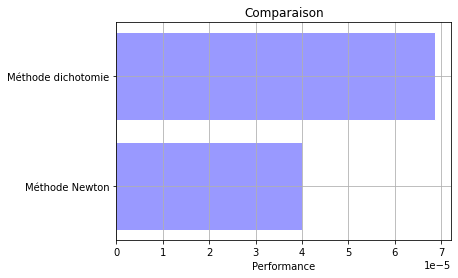

In [6]:
from pylab import *

val = [t2-t1,t3-t2]    # the bar lengths
pos = [1,2]    # the bar centers on the y axis
legende = ("Méthode Newton", "Méthode dichotomie")
figure(1)
barh(pos,val, align='center',facecolor='#9999ff', edgecolor='white')
yticks(pos, legende)
xlabel('Performance')
title('Comparaison')
grid(True)

show()